<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [10]:
#!pip install pandas 
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [129]:
# Read the CSV file
#df = pd.read_csv('survey-data.csv')

df = pd.read_csv("df_str_replaced.csv", index_col=0)

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [130]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [131]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [132]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [133]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [134]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [135]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [136]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

#sns.histplot(df['CompTotal'])
# CompTotal includes different currencies, not meaningful; instead use ConvertedCompYearly after removing extreme outliers
stats = df['ConvertedCompYearly'].describe()
print('Stats of ConvertedCompYearly:', stats)

# 3σ threshold
threshold = stats['mean']+stats['std']*3
print('μ + 3σ:', threshold)

# Q3+1.5IQR threshold
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(f'IQR = Q3 - Q1 = {Q3} - {Q1} = {IQR}')
print('Q1 - 1.5 IQR =', lower_bound)
print('Q3 + 1.5 IQR =', upper_bound)

Stats of ConvertedCompYearly: count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
μ + 3σ: 646426.2065215341
IQR = Q3 - Q1 = 107971.5 - 32712.0 = 75259.5
Q1 - 1.5 IQR = -80177.25
Q3 + 1.5 IQR = 220860.75


Skewness: 0.7354011412707415


<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

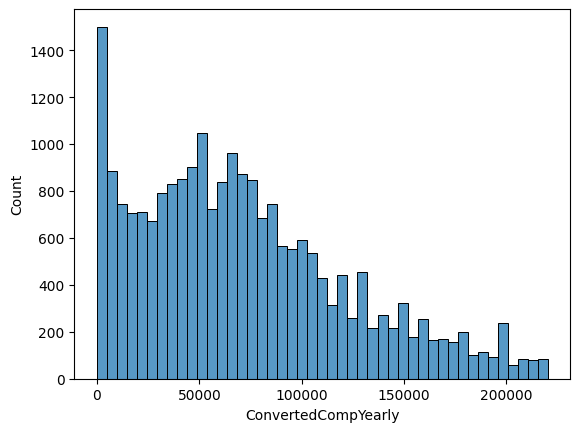

In [17]:
# exclude outliers above Q3+1.5IQR, do histplot
df2 = df[df['ConvertedCompYearly'] <= upper_bound]
print('Skewness:', df2['ConvertedCompYearly'].skew())
sns.histplot(df2['ConvertedCompYearly'])

**Box Plots**

Plot a box plot of Age.


<Axes: ylabel='Age_num'>

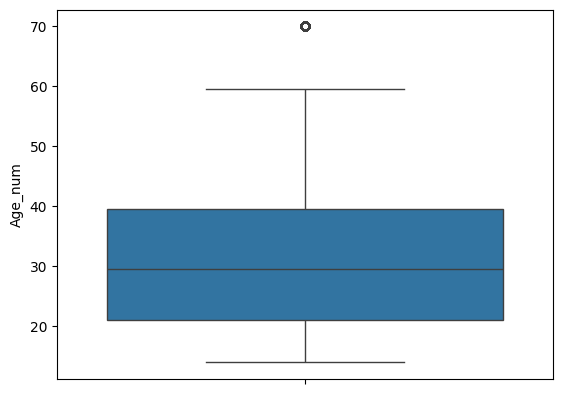

In [137]:
## Write your code here
# replace range with approximate number
df['Age_num'] = df['Age'].replace({
    '25-34 years old': '29.5',
    '35-44 years old': '39.5',
    '18-24 years old': '21',
    '45-54 years old': '49.5',
    '55-64 years old': '59.5',
    'Under 18 years old': '14',
    '65 years or older': '70',
    'Prefer not to say': '0'}).astype(float)
# clean up by replacing 0.0 with mean
mean_age = df[df['Age_num'] != 0.0]['Age_num'].mean()
df.loc[:,'Age_num'] = df['Age_num'].replace(to_replace=0.0, value=mean_age)
# boxplot
sns.boxplot(df['Age_num'])

### Visualizing Relationships in Data


**Scatter Plots**

Create a scatter plot of Age and WorkExp.


<Axes: xlabel='Age_num', ylabel='WorkExp'>

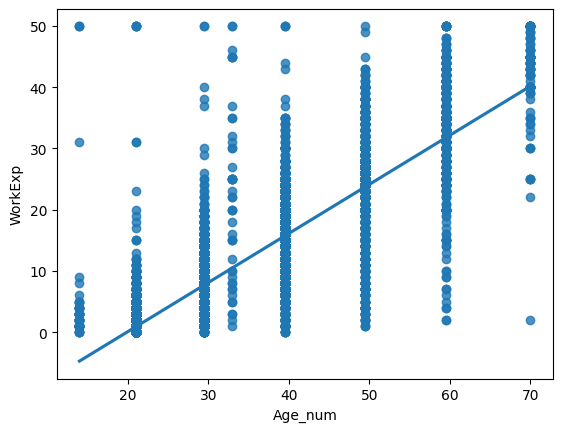

In [83]:
## Write your code here
sns.regplot(data=df, x='Age_num', y='WorkExp')

<Axes: xlabel='Age_num', ylabel='WorkExp'>

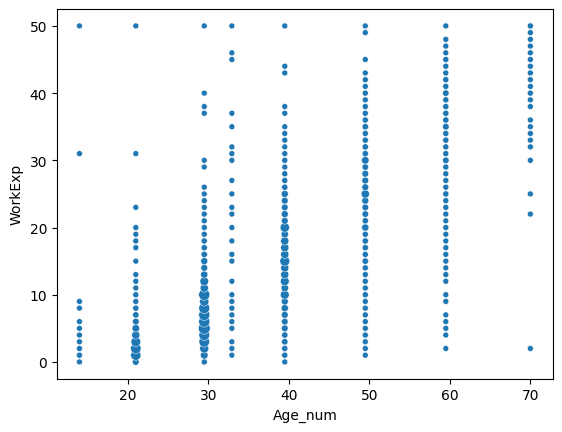

In [84]:
# show count as dot size
weighted = df.groupby(['Age_num', 'WorkExp']).count().reset_index()
sns.scatterplot(data=weighted, x='Age_num', y='WorkExp', size='ResponseId', legend=False)

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [44]:
df['TimeSearching'].value_counts()

TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

In [138]:
# replace range with approximate number
df['SearchTime'] = df['TimeSearching'].replace({
    '30-60 minutes a day': '45',
    '15-30 minutes a day': '22.5',
    '60-120 minutes a day': '90',
    'Less than 15 minutes a day': '10',
    'Over 120 minutes a day': '120'}).astype(float)
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Age_num                float64
SearchTime             float64
Length: 116, dtype: object

In [43]:
## Write your code here
# one-hot encode the Frustration column
df_encoded = df['Frustration'].str.get_dummies(sep=';')
df_encoded.sum().sort_values(ascending=False)

Amount of technical debt                                  17614
Complexity of tech stack for build                         9284
Complexity of tech stack for deployment                    9132
Reliability of tools/systems used in work                  8904
Tracking my work                                           7652
Patching/updating core components                          7091
Number of software tools in use                            6432
Showing my contributions                                   5546
Maintaining security of code being produced                5253
Maintaining security of systems/platforms used in work     4351
None of these                                              2450
dtype: int64

Text(0.5, 1.0, 'Maintaining security of systems/platforms used in work')

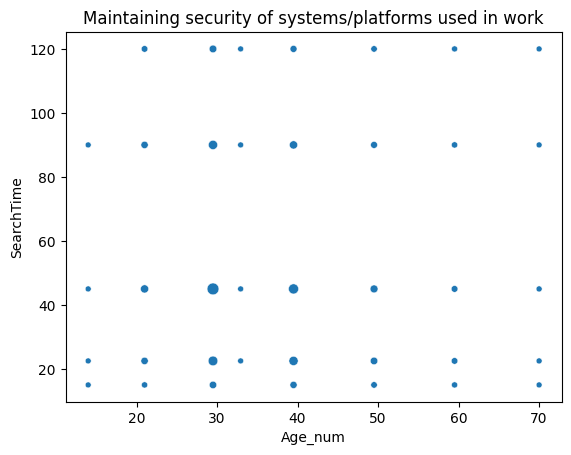

In [92]:
# add the encoded Frustration columns
df3 = pd.concat([df, df_encoded], axis=1)
frust = 'Maintaining security of systems/platforms used in work'
weighted = df3[df3[frust] == 1].groupby(['Age_num', 'SearchTime']).count().reset_index()
sns.scatterplot(data=weighted, x='Age_num', y='SearchTime', size='ResponseId', legend=False)
plt.title(frust)

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [98]:
## Write your code here
# one-hot encode the DatabaseWantToWorkWith column
df_encoded = df['DatabaseWantToWorkWith'].str.get_dummies(sep=';')
top5db = df_encoded.sum().sort_values(ascending=False).head()

PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
dtype: int64

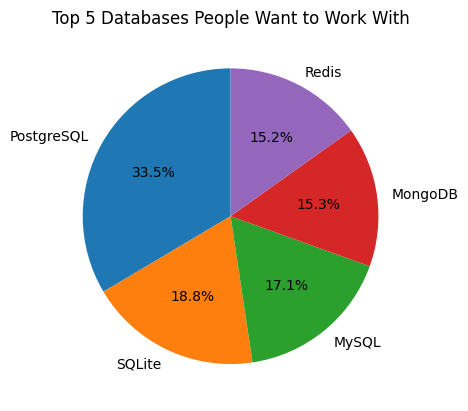

In [102]:
# show pie chart
plt.pie(top5db, labels=top5db.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases People Want to Work With')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [111]:
df['TimeAnswering'].value_counts()

TimeAnswering
15-30 minutes a day           9341
30-60 minutes a day           8642
Less than 15 minutes a day    5918
60-120 minutes a day          3704
Over 120 minutes a day        1239
Name: count, dtype: int64

In [139]:
df['AnswerTime'] = df['TimeAnswering'].replace({
    '30-60 minutes a day': '45',
    '15-30 minutes a day': '22.5',
    '60-120 minutes a day': '90',
    'Less than 15 minutes a day': '10',
    'Over 120 minutes a day': '120'}).astype(float)

In [140]:
## Write your code here
at = df.groupby('Age')['AnswerTime'].median()
at

Age
18-24 years old       22.50
25-34 years old       22.50
35-44 years old       45.00
45-54 years old       45.00
55-64 years old       22.50
65 years or older     22.50
Prefer not to say     22.50
Under 18 years old    16.25
Name: AnswerTime, dtype: float64

In [151]:
# for showing the age groups in a meaningful order
reorder_index = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
]
at2 = at.reindex(reorder_index)
at2

Age
Under 18 years old    16.25
18-24 years old       22.50
25-34 years old       22.50
35-44 years old       45.00
45-54 years old       45.00
55-64 years old       22.50
65 years or older     22.50
Name: AnswerTime, dtype: float64

In [152]:
st = df.groupby('Age')['SearchTime'].median()
st2 = st.reindex(reorder_index)
st2

Age
Under 18 years old    45.0
18-24 years old       45.0
25-34 years old       45.0
35-44 years old       45.0
45-54 years old       45.0
55-64 years old       45.0
65 years or older     45.0
Name: SearchTime, dtype: float64

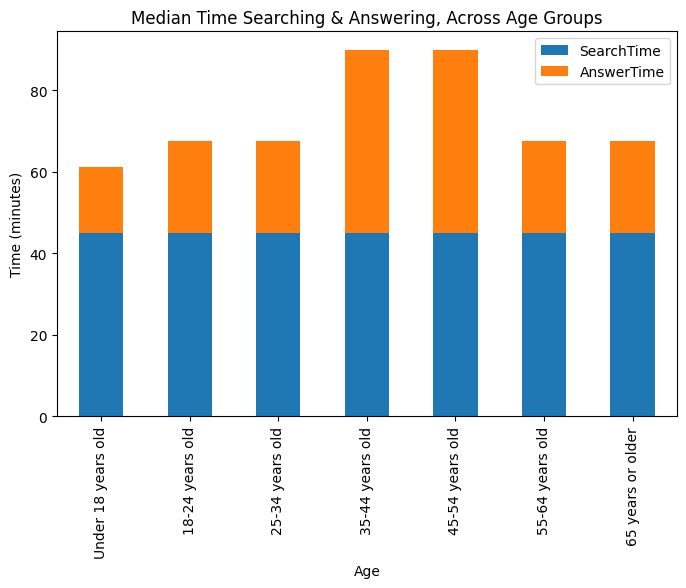

In [153]:
df3 =pd.concat([st2, at2], axis=1)
df3.plot(kind='bar', stacked=True, figsize=(8, 5))

# Add labels and a title
plt.title('Median Time Searching & Answering, Across Age Groups')
plt.ylabel('Time (minutes)')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


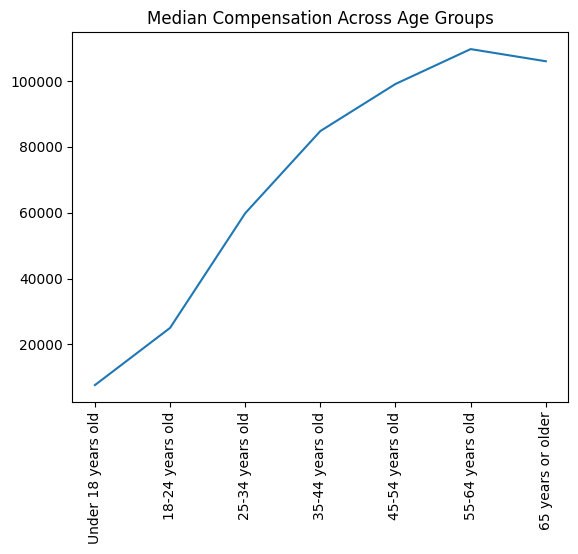

In [156]:
## Write your code here
# use ConvertedCompYearly
#sns.lineplot(df.groupby('Age')['ConvertedCompYearly'].median())
plt.plot(df.groupby('Age')['ConvertedCompYearly'].median().reindex(reorder_index))
plt.xticks(rotation=90)
plt.title('Median Compensation Across Age Groups')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


<Axes: xlabel='count', ylabel='MainBranch'>

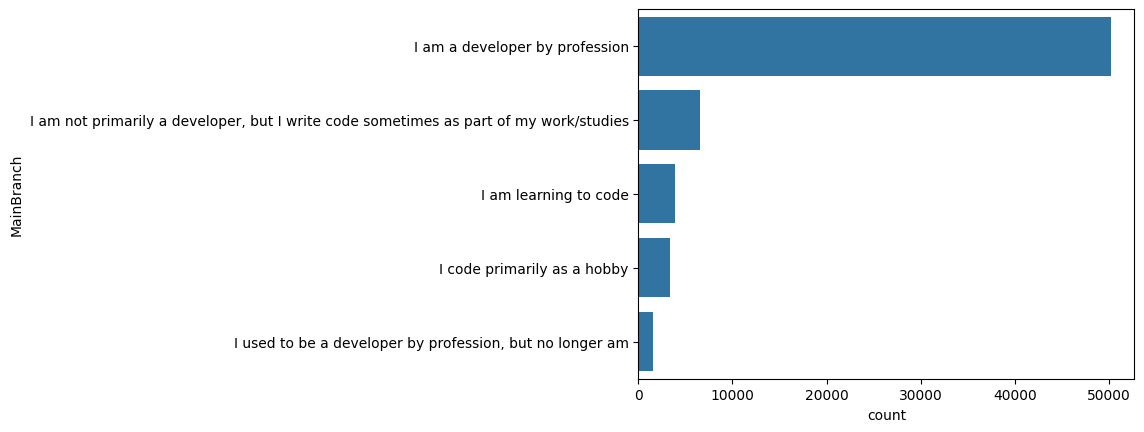

In [159]:
## Write your code here
sns.barplot(df['MainBranch'].value_counts(), orient='h')

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [160]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
